In [132]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import plotter as p
import jupyter as j
import plotter3 as p3
import plotter4 as p4
import plotterm as pm
import importlib
from tabulate import tabulate

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/nokia_vodacom/centurycity/quectel/']

In [133]:
def mdb(mean=True):
    importlib.reload(p)
    importlib.reload(j)
    files = [['release/release0/*', 'release/release1/*','release/release16/*'],['release/release64/*','release/release128/*'],['release/release256/*','release/release512/*']]
    files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
    files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*'])#, 'cops/tensec/*'])
    files.append(['drx/cap/*'])
    files.append(['ptau/capture/*'])
    dirrs = ['logs/zte_mtn/rf_shield/quectel/', 'logs/zte_mtn/rf_shield/ublox/','logs/nokia_vodacom/centurycity/quectel/', 'logs/nokia_vodacom/centurycity/ublox/']
    # atd = p.attdt()
    mdb = []
    for f in files:
        atd = p.scatternuator('energy_snr_zte_log' + 'ky', 'kx', 'ky', 'thresh', [None]*4, 'scale', 'limited', dirrs, f, mean=mean, ttype='return')
        mdb.append(atd)
    return mdb

def db():
    return mdb(False)

In [134]:
def plot(*args, **kwargs):
    importlib.reload(pm)
    K = kwargs.pop('K') if 'K' in kwargs else None
#     p3.plot(mdb(), *args, **kwargs, folder='plotter3')
#     mcount[args[1]+' vs '+args[0]] = p3.hist()
#     p3.plot(database, *args, **kwargs, folder='plottera')
#     acount[args[1]+' vs '+args[0]] = p3.hist()
    return pm.plot(db(), *args, **kwargs, K=K if K else 3, folder='plotterm')
#     kcount[args[1]+' vs '+args[0]] = p4.hist()

# #Latency

custom jupyter @DanielRobinson
|             |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-------------|-------------|---------------|-----------------|-------------------|
| Latency (s) |     4.25246 |       7.73304 |         11.0561 |           23.6247 |


[4.252463542081639, 7.73304135493424, 11.056104367934227, 23.624679938271605]

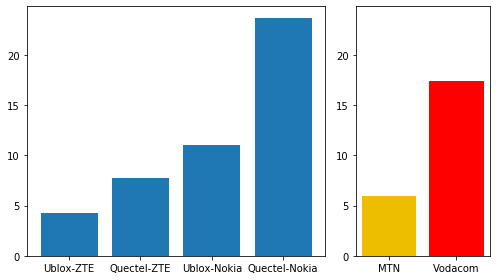

In [137]:
d = plot('SNR', 'txTime', 'SNR (dB)', 'Latency (s)', scale=[10,1000], invert=[False, True], K=5)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|             |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-------------|-------------|---------------|-----------------|-------------------|
| Latency (s) |      5.5268 |         10.76 |         12.5608 |           27.7113 |
|             |     MTN |   Vodacom |
|-------------|---------|-----------|
| Latency (s) | 8.14339 |   20.1361 |
RSRP (dBm)


[5.526796501772229, 10.759974923969672, 12.560801853305422, 27.711299834237487]

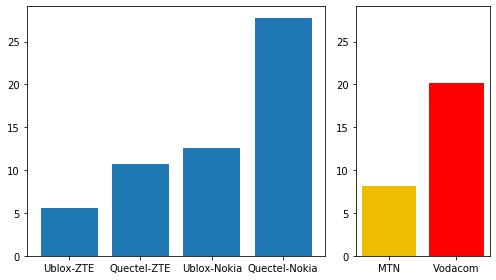

In [171]:
d = plot('Signal power', 'txTime', 'RSRP (dBm)', 'Latency (s)', scale=[10,1000], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                    |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------------|-------------|---------------|-----------------|-------------------|
| Transmit Latency ( |    0.517468 |       1.33562 |         14.4993 |           4.19134 |
|                  |      MTN |   Vodacom |
|------------------|----------|-----------|
| Transmit Latency | 0.926546 |   9.34534 |
RSRP (dBm)


[0.5174677871148459, 1.3356245009715602, 14.499341530054645, 4.191337037037038]

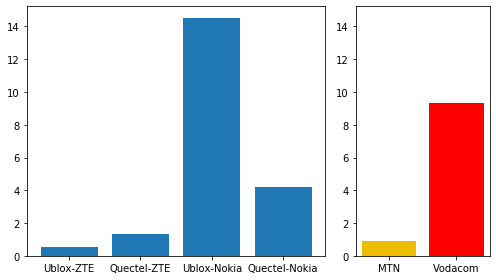

In [172]:
d = plot('Signal power', 'txTimeNW', 'RSRP (dBm)', 'Transmit Latency (s)', scale=[10,1000], invert=[False, True], K=5)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                    |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------------|-------------|---------------|-----------------|-------------------|
| Receive Latency (s |     1.28067 |       3.31065 |         60.4745 |           10.5279 |
|                    |     MTN |   Vodacom |
|--------------------|---------|-----------|
| Receive Latency (s | 2.29566 |   35.5012 |
RSRP (dBm)


[1.2806690122583684, 3.310652222981697, 60.474460265700486, 10.527904333333334]

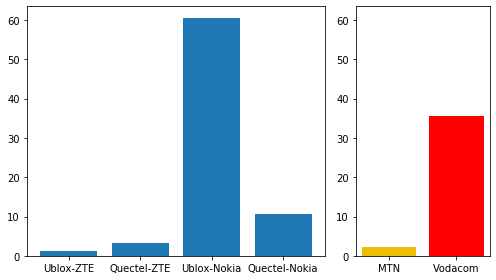

In [173]:
d = plot('Signal power', 'rxTimeNW', 'RSRP (dBm)', 'Receive Latency (s)', scale=[10,1000], invert=[False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|             |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-------------|-------------|---------------|-----------------|-------------------|
| Latency (s) |     4.69124 |       10.7602 |         12.5608 |           24.8234 |
|             |     MTN |   Vodacom |
|-------------|---------|-----------|
| Latency (s) | 7.72571 |   18.6921 |
Transmit power (dBm)


[4.6912374633996, 10.76019214008689, 12.560801853305422, 24.823389158730162]

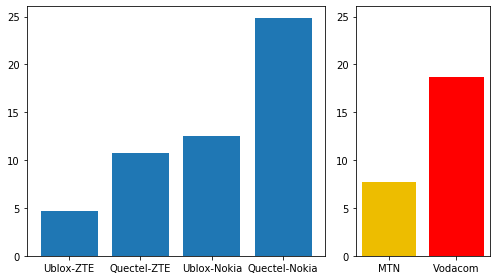

In [174]:
d=plot('TX power', 'txTime', 'Transmit power (dBm)', 'Latency (s)', scale=[10,1000], invert=[False, True])#, loc='best', bbox=None)
[np.mean(m) for m in d]

# #Power saving

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| Energy (J) |     11.3519 |       21.9715 |         21.9968 |           57.7098 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| Energy (J) | 16.6617 |   39.8533 |
RSRP (dBm)


[11.351947932565846, 21.971477757625962, 21.996763925838895, 57.70982148726836]

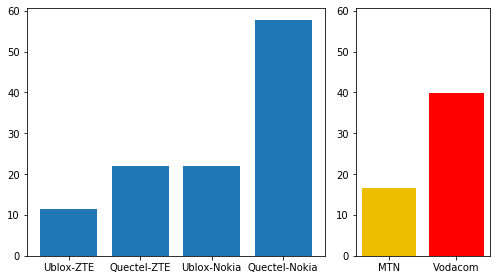

In [175]:
d=plot('Signal power', 'energy', 'RSRP (dBm)', 'Energy (J)', [10,1000], [False, True])
[np.mean(m) for m in d]

In [176]:
# print(tabulate([np.insert([str(np.mean(m)) for m in d], 0, 'Energy (J)')], nw, tablefmt="github"))

In [177]:
tab = []
nw = ["Metric", "Ublox-MTN", "Quectel-MTN", "Ublox-Vodacom", "Quectel-Vodacom"]
for c, n in zip(d, nw):
#     u, cnts = np.unique(c, return_counts=True)
    cnts = np.mean(c)
    print(cnts)
    t = [n, cnts]
    t = [r for r in t]
    print(t)
    tab.append(t)
headers = nw
tab[0].append(0)
print(tabulate(tab, nw, tablefmt="github"))

11.351947932565846
['Metric', 11.351947932565846]
21.971477757625962
['Ublox-MTN', 21.971477757625962]
21.996763925838895
['Quectel-MTN', 21.996763925838895]
57.70982148726836
['Ublox-Vodacom', 57.70982148726836]
| Metric        |   Ublox-MTN |   Quectel-MTN |
|---------------|-------------|---------------|
| Metric        |     11.3519 |             0 |
| Ublox-MTN     |     21.9715 |               |
| Quectel-MTN   |     21.9968 |               |
| Ublox-Vodacom |     57.7098 |               |


In [178]:
tab

[['Metric', 11.351947932565846, 0],
 ['Ublox-MTN', 21.971477757625962],
 ['Quectel-MTN', 21.996763925838895],
 ['Ublox-Vodacom', 57.70982148726836]]

In [179]:
print(tabulate([[1,2,3]], [4,5,6], tablefmt="github"))

|   4 |   5 |   6 |
|-----|-----|-----|
|   1 |   2 |   3 |


custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| Energy (J) |     11.3519 |       21.9708 |         21.9968 |           57.7098 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| Energy (J) | 16.6614 |   39.8533 |
RSRP (dBm)


[11.351947932565846, 21.97075225396296, 21.996763925838902, 57.70982148726834]

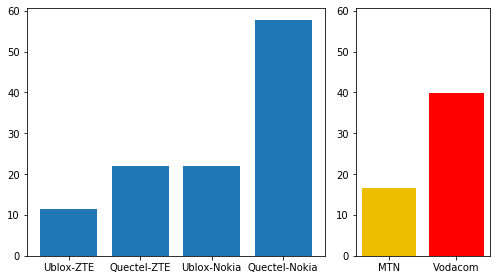

In [180]:
d=plot('Signal power', 'energy', 'RSRP (dBm)', 'Energy (J)', [10,1000], [False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| Energy (J) |     11.3519 |       21.9718 |         21.9968 |           57.7099 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| Energy (J) | 16.6619 |   39.8533 |
RSSI (dBm)


[11.351947918238903, 21.97180436441661, 21.996763925838902, 57.70989985205814]

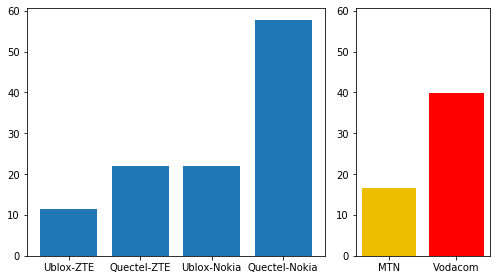

In [181]:
d=plot('Total power', 'energy', 'RSSI (dBm)', 'Energy (J)', scale=[10,1000], invert=[False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                  |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------------|-------------|---------------|-----------------|-------------------|
| Max current (mA) |     102.837 |       104.121 |         106.566 |           108.684 |
|                  |     MTN |   Vodacom |
|------------------|---------|-----------|
| Max current (mA) | 103.479 |   107.625 |
RSRP (dBm)


[102.8372399445215, 104.121374633996, 106.56608314211228, 108.68369708994709]

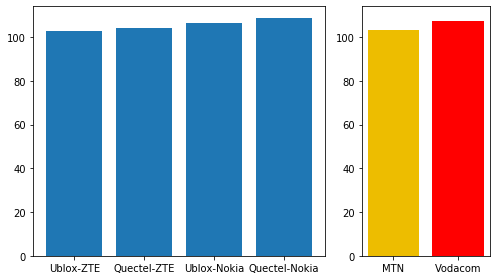

In [182]:
d=plot('Signal power', 'maxCurrent', 'RSRP (dBm)', 'Max current (mA)', scale=[10,1], invert=[False, True])#, loc='lower left', bbox=None)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                    |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------------|-------------|---------------|-----------------|-------------------|
| Transmit power (dB |     16.9598 |        14.801 |         16.1628 |           18.6389 |
|                    |     MTN |   Vodacom |
|--------------------|---------|-----------|
| Transmit power (dB | 15.8804 |   17.4008 |
RSRP (dBm)


[16.959821428571427, 14.800966183574879, 16.162790697674417, 18.63888888888889]

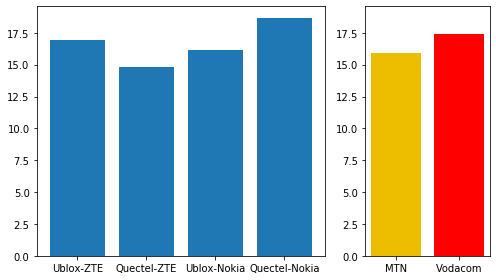

In [183]:
d=plot('Signal power', 'TX power', 'RSRP (dBm)', 'Transmit power (dBm)', scale=[10,10], invert=[False, True])#, loc='lower left', bbox=None)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                    |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------------|-------------|---------------|-----------------|-------------------|
| Transmit power (dB |     16.9777 |       14.8986 |          16.093 |           18.6389 |
|                    |     MTN |   Vodacom |
|--------------------|---------|-----------|
| Transmit power (dB | 15.9381 |    17.366 |
RSSI (dBm)


[16.977678571428573, 14.898550724637682, 16.093023255813954, 18.63888888888889]

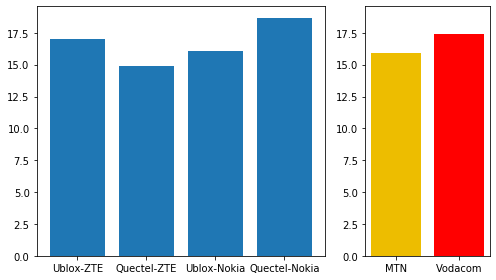

In [184]:
d=plot('Total power', 'TX power', 'RSSI (dBm)', 'Transmit power (dBm)', scale=[10,10], invert=[False, True])#, loc='lower left', bbox=None)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| Energy (J) |     11.3183 |       22.1932 |         38.7086 |           68.3731 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| Energy (J) | 16.7558 |   53.5408 |
Latency (s)


[11.318317651098114, 22.193196764645528, 38.708550239090805, 68.37307637751529]

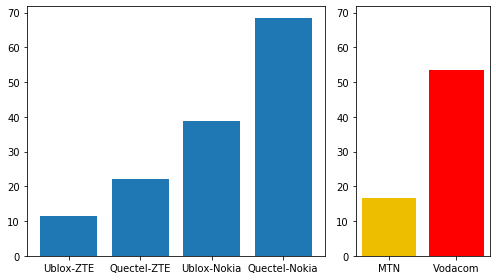

In [185]:
d=plot('txTime', 'energy', 'Latency (s)', 'Energy (J)', [1000,1000], [True, False])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| Energy (J) |     10.1416 |       21.9395 |         21.9968 |           54.0368 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| Energy (J) | 16.0406 |   38.0168 |
Transmit power (dBm)


[10.14161808313274, 21.939541627835062, 21.996815150328697, 54.03677804447294]

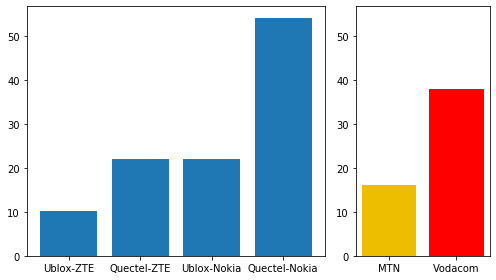

In [186]:
d=plot('TX power', 'energy', 'Transmit power (dBm)', 'Energy (J)', scale=[10,1000], invert=[False, True])#, loc='center left', bbox=None)
[np.mean(m) for m in d]

# #RF Receive metrics

RSRQ = N x RSRP / RSSI

In [187]:
# -200 = N * -130 / -110

# 13/11

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| RSSI (dBm) |    -93.3134 |      -89.4922 |        -83.2977 |          -82.2805 |
|            |      MTN |   Vodacom |
|------------|----------|-----------|
| RSSI (dBm) | -91.4028 |  -82.7891 |
RSRP (dBm)


[-93.3133629148629, -89.4921922244422, -83.29772708314786, -82.2805074199305]

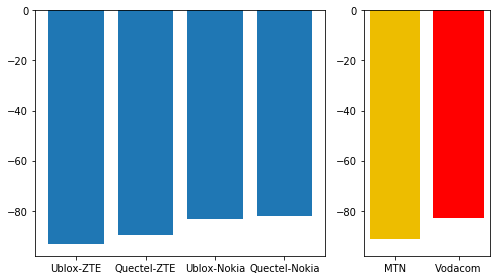

In [188]:
d=plot('Signal power', 'Total power', 'RSRP (dBm)', 'RSSI (dBm)', scale=[10,10], invert=[False, True])#, loc='lower right', bbox=None)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|           |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-----------|-------------|---------------|-----------------|-------------------|
| SINR (dB) |     2.76909 |       4.09459 |         3.48348 |            3.2307 |
|           |     MTN |   Vodacom |
|-----------|---------|-----------|
| SINR (dB) | 3.43184 |   3.35709 |
RSRP (dBm)


[2.769086954711955, 4.094593577835175, 3.4834812675619715, 3.230699216395419]

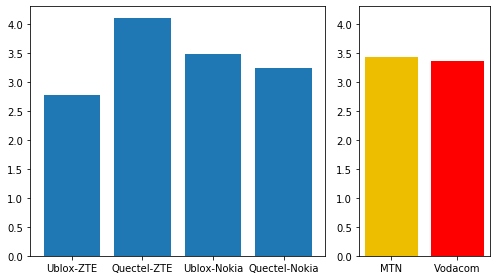

In [189]:
d=plot('Signal power', 'SNR', 'RSRP (dBm)', 'SINR (dB)', scale=[10,10], invert=[False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|           |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-----------|-------------|---------------|-----------------|-------------------|
| RSRQ (dB) |    -13.0974 |      -12.9318 |        -13.1988 |          -13.0928 |
|           |      MTN |   Vodacom |
|-----------|----------|-----------|
| RSRQ (dB) | -13.0146 |  -13.1458 |
RSRP (dBm)


[-13.097435897435897,
 -12.93178420256992,
 -13.198833819241985,
 -13.092823305386595]

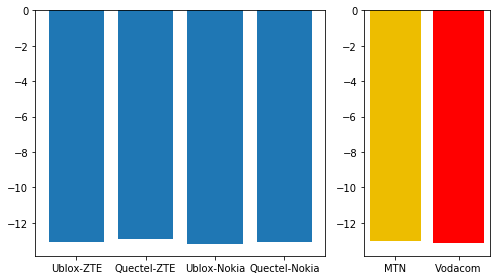

In [190]:
d=plot('Signal power', 'RSRQ', 'RSRP (dBm)', 'RSRQ (dB)', scale=[10,10], invert=[False, True])#, loc='lower right', bbox=None)
[np.mean(m) for m in d]

# #Packet metrics

custom jupyter @DanielRobinson
|              |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------|-------------|---------------|-----------------|-------------------|
| TX Bytes (B) |     345.799 |        852.68 |            3113 |           446.482 |
|              |     MTN |   Vodacom |
|--------------|---------|-----------|
| TX Bytes (B) | 599.239 |   1779.74 |
RSRP (dBm)


[345.7986486486487, 852.6797899159665, 3112.9957264957266, 446.48214285714283]

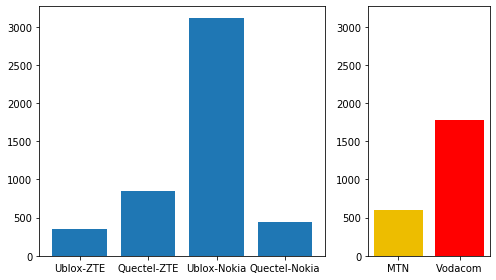

In [191]:
d=plot('Signal power', 'txBytes', 'RSRP (dBm)', 'TX Bytes (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|              |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------|-------------|---------------|-----------------|-------------------|
| RX Bytes (B) |     109.161 |       386.651 |         769.311 |           147.708 |
|              |     MTN |   Vodacom |
|--------------|---------|-----------|
| RX Bytes (B) | 247.906 |    458.51 |
RSRP (dBm)


[345.7986486486487, 852.6797899159665, 3112.9957264957266, 446.48214285714283]

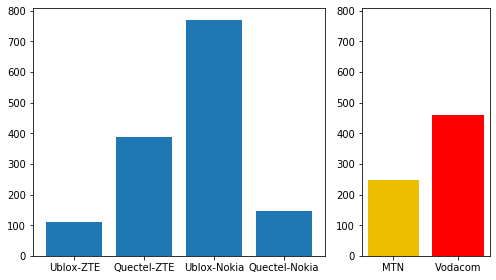

In [192]:
plot('Signal power', 'rxBytes', 'RSRP (dBm)', 'RX Bytes (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                    |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------------|-------------|---------------|-----------------|-------------------|
| ACK/NACK RX Packet |        20.1 |           7.5 |         13.2121 |           12.2667 |
|                   |   MTN |   Vodacom |
|-------------------|-------|-----------|
| ACK/NACK RX Packe |  13.8 |   12.7394 |
RSRP (dBm)


[20.1, 7.5, 13.212121212121213, 12.266666666666667]

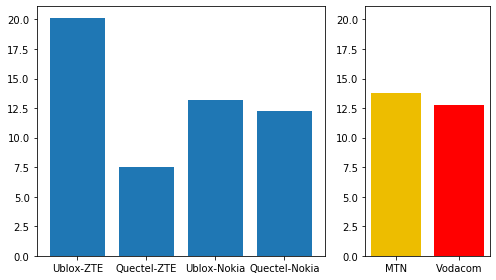

In [193]:
d=plot('Signal power', 'Total ACK NACK RX', 'RSRP (dBm)', 'ACK/NACK RX Packets', scale=[10,1], invert=[False, True], K=3)#, loc='upper center', bbox=None)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|              |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------|-------------|---------------|-----------------|-------------------|
| TX Bytes (B) |     345.013 |       852.081 |            3113 |           446.482 |
|              |     MTN |   Vodacom |
|--------------|---------|-----------|
| TX Bytes (B) | 598.547 |   1779.74 |
SINR (dB)


[345.0126126126126, 852.0809803921569, 3112.9957264957266, 446.48214285714283]

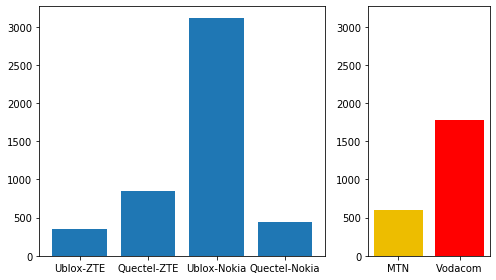

In [194]:
d=plot('SNR', 'txBytes', 'SINR (dB)', 'TX Bytes (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

# #Memory

custom jupyter @DanielRobinson
|                    |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------------|-------------|---------------|-----------------|-------------------|
| Currently allocate |     26195.4 |       16282.4 |         26157.7 |           16282.8 |
|                    |     MTN |   Vodacom |
|--------------------|---------|-----------|
| Currently allocate | 21238.9 |   21220.3 |
RSRP (dBm)


[26195.36842105263, 16282.439024390244, 26157.739130434784, 16282.76923076923]

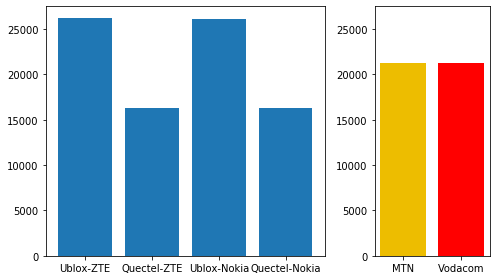

In [195]:
d=plot('Signal power', 'Current Allocated', 'RSRP (dBm)', 'Currently allocated memory', scale=[10,1], invert=[False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                   |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-------------------|-------------|---------------|-----------------|-------------------|
| Total free memory |     17140.6 |       6717.56 |         17178.3 |           6717.23 |
|                   |     MTN |   Vodacom |
|-------------------|---------|-----------|
| Total free memory | 11929.1 |   11947.7 |
RSRP (dBm)


[17140.63157894737, 6717.5609756097565, 17178.260869565216, 6717.2307692307695]

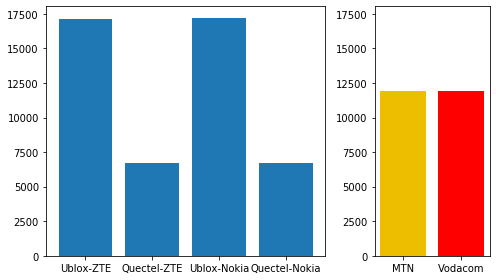

In [196]:
d=plot('Signal power', 'Total Free', 'RSRP (dBm)', 'Total free memory', scale=[10,1], invert=[False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                 |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-----------------|-------------|---------------|-----------------|-------------------|
| Max free memory |       15264 |       6706.63 |           15264 |           6705.74 |
|                 |     MTN |   Vodacom |
|-----------------|---------|-----------|
| Max free memory | 10985.3 |   10984.9 |
RSRP (dBm)


[15264.0, 6706.634146341464, 15264.0, 6705.74358974359]

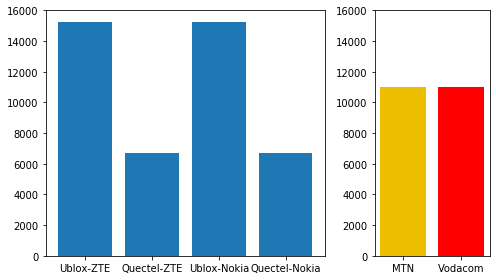

In [197]:
d=plot('Signal power', 'Max Free', 'RSRP (dBm)', 'Max free memory', scale=[10,1], invert=[False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                   |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-------------------|-------------|---------------|-----------------|-------------------|
| Num Allocs memory |     1929.51 |       1891.28 |         935.858 |           1649.79 |
|                   |     MTN |   Vodacom |
|-------------------|---------|-----------|
| Num Allocs memory | 1910.39 |   1292.83 |
RSRP (dBm)


[1929.5056338899194, 1891.280113378685, 935.8584235167702, 1649.7939197581604]

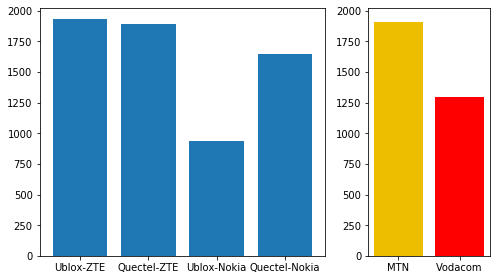

In [198]:
d=plot('Signal power', 'Num Allocs', 'RSRP (dBm)', 'Num Allocs memory', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                  |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------------|-------------|---------------|-----------------|-------------------|
| Num Frees memory |     1715.42 |       1825.09 |         710.652 |           1583.63 |
|                  |     MTN |   Vodacom |
|------------------|---------|-----------|
| Num Frees memory | 1770.26 |   1147.14 |
RSRP (dBm)


[1715.4192846835704, 1825.0914290160508, 710.6522202220222, 1583.6255954664184]

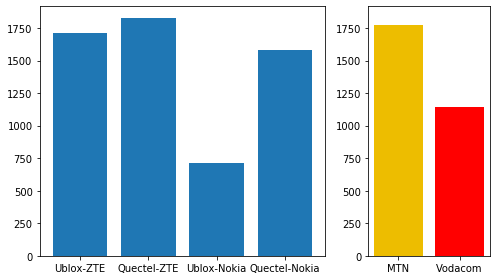

In [199]:
d=plot('Signal power', 'Num Frees', 'RSRP (dBm)', 'Num Frees memory', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

# #Throughput

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| RLC UL (B) |     468.846 |       336.887 |         345.109 |           201.274 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| RLC UL (B) | 402.866 |   273.191 |
RSRP (dBm)


[468.84615384615387,
 336.88652482269504,
 345.10873983739833,
 201.27380952380955]

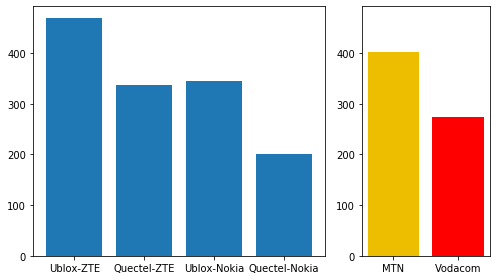

In [200]:
d=plot('Signal power', 'RLC UL', 'RSRP (dBm)', 'RLC UL (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| RLC DL (B) |     240.222 |       144.186 |         77.1014 |           43.2787 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| RLC DL (B) | 192.204 |     60.19 |
RSRP (dBm)


[240.22222222222223, 144.18627450980392, 77.10139573070607, 43.278703703703705]

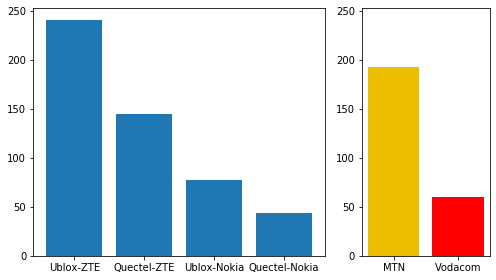

In [201]:
d=plot('Signal power', 'RLC DL', 'RSRP (dBm)', 'RLC DL (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| MAC UL (B) |     568.269 |       554.038 |         357.295 |           292.272 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| MAC UL (B) | 561.154 |   324.784 |
RSRP (dBm)


[568.2692307692307, 554.0381944444445, 357.29528985507244, 292.2723039215686]

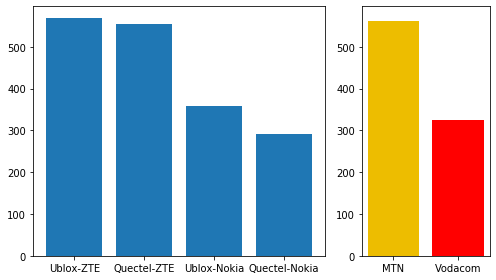

In [202]:
d=plot('Signal power', 'MAC UL', 'RSRP (dBm)', 'MAC UL (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| MAC UL (B) |     321.125 |       181.181 |         87.4659 |           55.1858 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| MAC UL (B) | 251.153 |   71.3259 |
RSRP (dBm)


[321.125, 181.18055555555557, 87.46593406593406, 55.18582089552238]

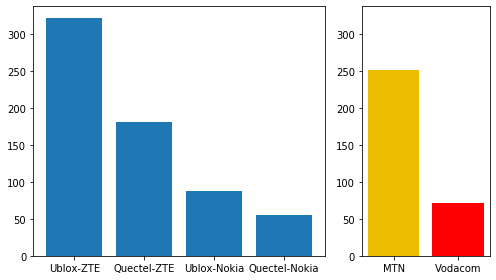

In [203]:
d=plot('Signal power', 'MAC DL', 'RSRP (dBm)', 'MAC UL (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

# #Network metrics

custom jupyter @DanielRobinson


No handles with labels found to put in legend.


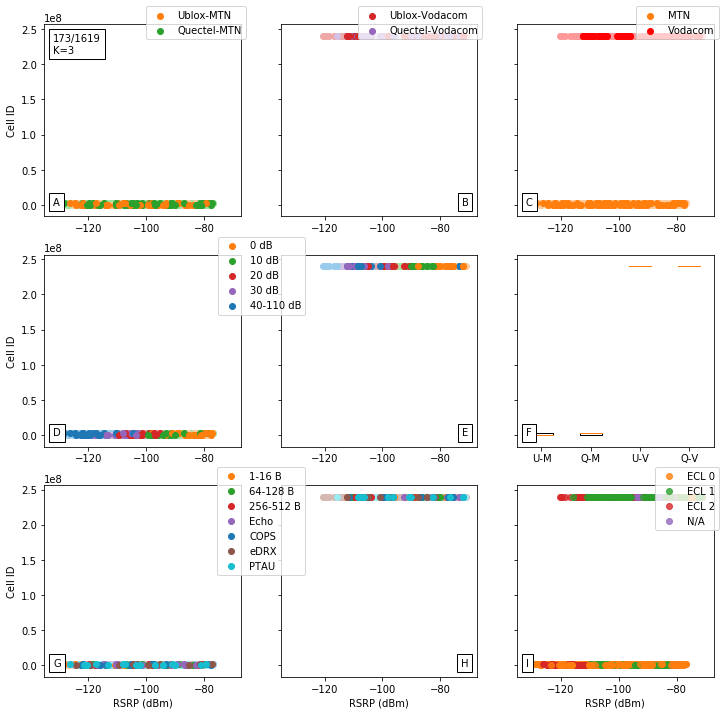

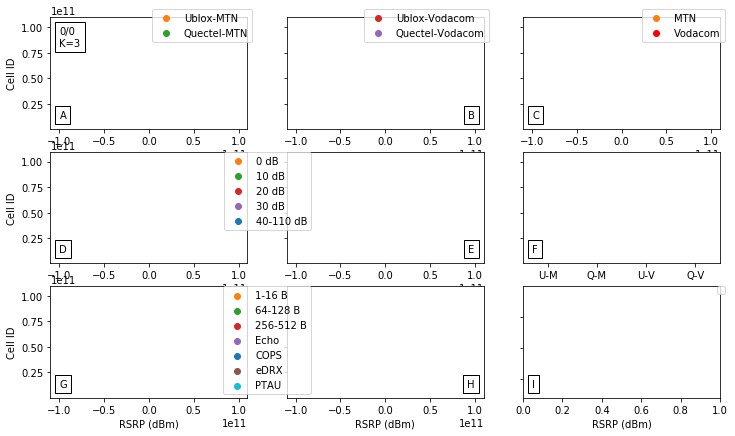

7 4 5
ky Cell ID 173 + 0 = 173


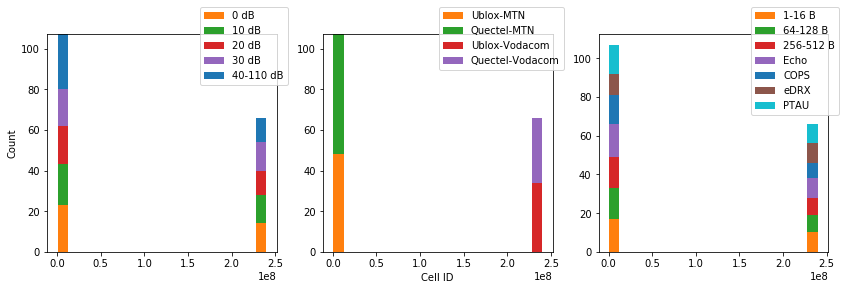

In [73]:
plot('Signal power', 'Cell ID', 'RSRP (dBm)', 'Cell ID', scale=[10,1], invert=[False, True], K=3)

ky Cell_ID 173 + 0 = 173


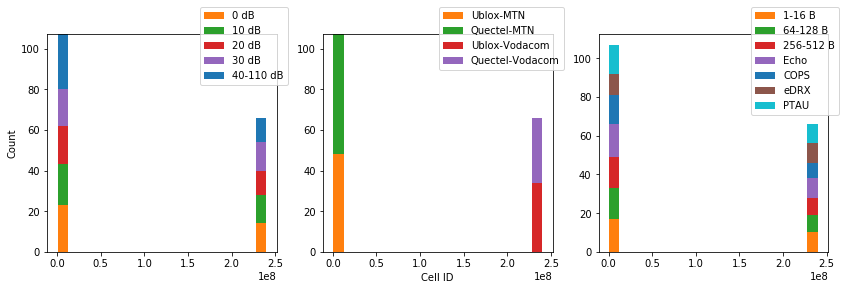

[ 484196. 2671716. 2672484.] [34 13  1]
[ 484196. 2671716. 2672484.] [26 29  4]
[2.399e+08] [34]
[2.399e+08] [32]
|                 |   239882509 |   2671716 |   2672484 |   484196 |
|-----------------|-------------|-----------|-----------|----------|
| Ublox-MTN       |          34 |        13 |         1 |        0 |
| Quectel-MTN     |          26 |        29 |         4 |          |
| Ublox-Vodacom   |          34 |           |           |          |
| Quectel-Vodacom |          32 |           |           |          |


In [300]:
_, _, cellid = p3.hist()
# cid = np.array([np.array(cd) for cd in cellid])
cid = cellid
ulist = []
clist = []
tab = []
nw = ["Ublox-MTN", "Quectel-MTN", "Ublox-Vodacom", "Quectel-Vodacom"]
for c, n in zip(cid, nw):
    u, cnts = np.unique(c, return_counts=True)
    print(u, cnts)
    t = [[n], cnts]
    t = [p for r in t for p in r]
    tab.append(t)
    ulist.append(u)
    clist.append(c)
#     print(np.unique([s for u in ulist for s in u]), u)
# tab
# table = [["Ublox-MTN",42,3], ["Quectel-MTN",451,3], ["Ublox-Vodacom",4], ["Quectel-Vodacom",3]]
# headers = ["", "qty", "sun"]
headers = np.unique([str(int(el)) for u in ulist for el in u])
headers = np.insert(headers, 0, '')
tab[0].append(0)
print(tabulate(tab, headers, tablefmt="github"))

In [153]:
plot('Signal power', 'ECL', 'RSRP (dBm)', 'ECL', scale=[10,1], invert=[False, True], K=4)

custom jupyter @DanielRobinson


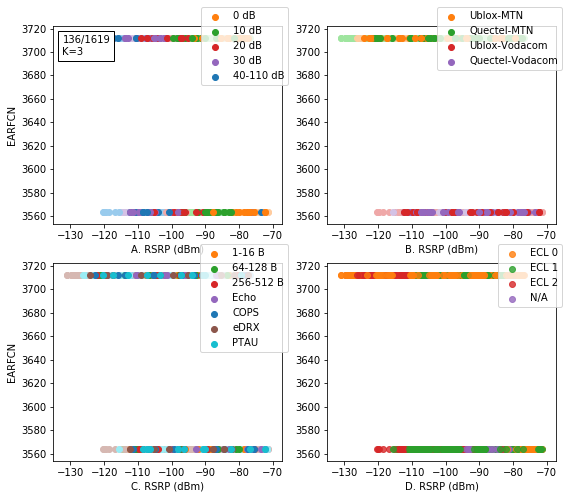

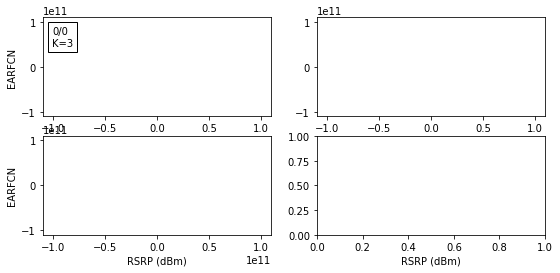

7 4 5
ky EARFCN 136 + 0 = 136


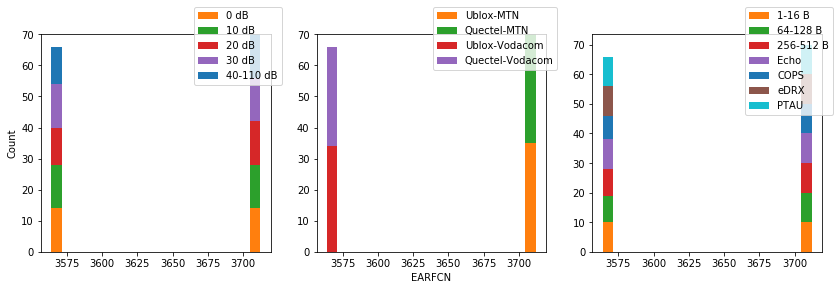

In [301]:
plot('Signal power', 'EARFCN', 'RSRP (dBm)', 'EARFCN', scale=[10,1], invert=[False, True])

ky EARFCN 136 + 0 = 136


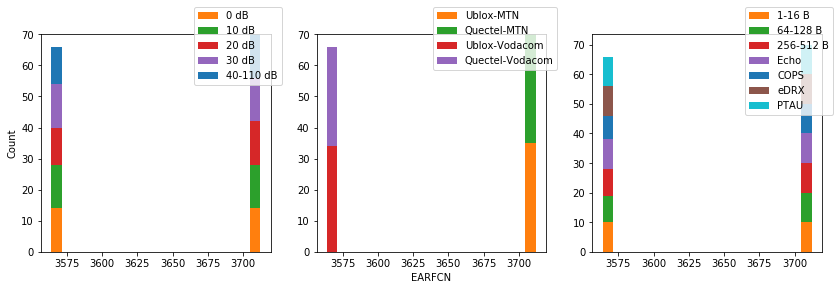

[3712.] [35]
[3712.] [35]
[3564.] [34]
[3564.] [32]
|                 |   3564 |   3712 |
|-----------------|--------|--------|
| Ublox-MTN       |     35 |      0 |
| Quectel-MTN     |     35 |        |
| Ublox-Vodacom   |     34 |        |
| Quectel-Vodacom |     32 |        |


In [302]:
_, _, cellid = p3.hist()
# cid = np.array([np.array(cd) for cd in cellid])
cid = cellid
ulist = []
clist = []
tab = []
nw = ["Ublox-MTN", "Quectel-MTN", "Ublox-Vodacom", "Quectel-Vodacom"]
for c, n in zip(cid, nw):
    u, cnts = np.unique(c, return_counts=True)
    print(u, cnts)
    t = [[n], cnts]
    t = [p for r in t for p in r]
    tab.append(t)
    ulist.append(u)
    clist.append(c)
#     print(np.unique([s for u in ulist for s in u]), u)
# tab
# table = [["Ublox-MTN",42,3], ["Quectel-MTN",451,3], ["Ublox-Vodacom",4], ["Quectel-Vodacom",3]]
# headers = ["", "qty", "sun"]
headers = np.unique([str(int(el)) for u in ulist for el in u])
headers = np.insert(headers, 0, '')
tab[0].append(0)
print(tabulate(tab, headers, tablefmt="github"))

custom jupyter @DanielRobinson


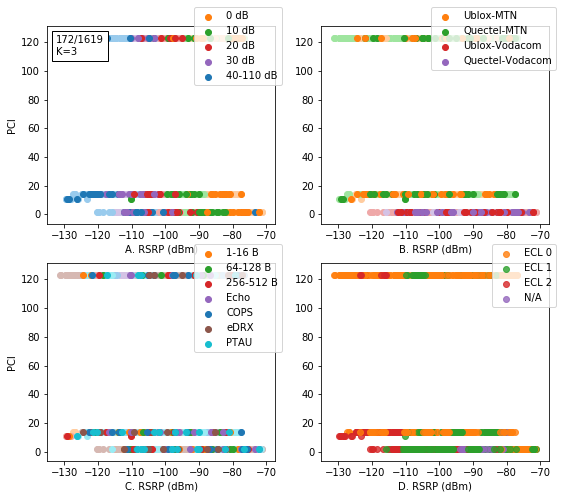

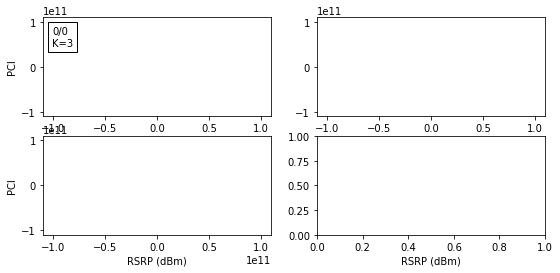

7 4 5
ky PCI 172 + 0 = 172


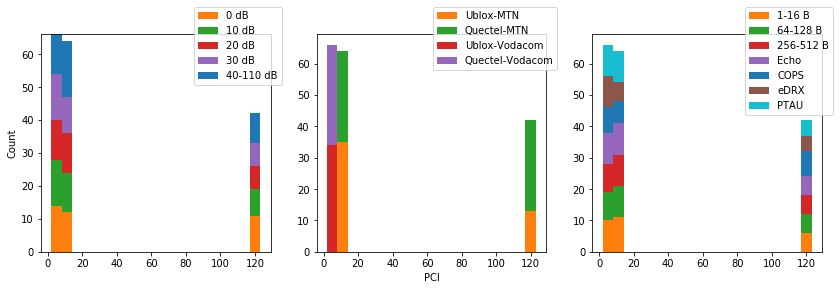

In [303]:
plot('Signal power', 'PCI', 'RSRP (dBm)', 'PCI', scale=[10,1], invert=[False, True], K=3)

ky PCI 172 + 0 = 172


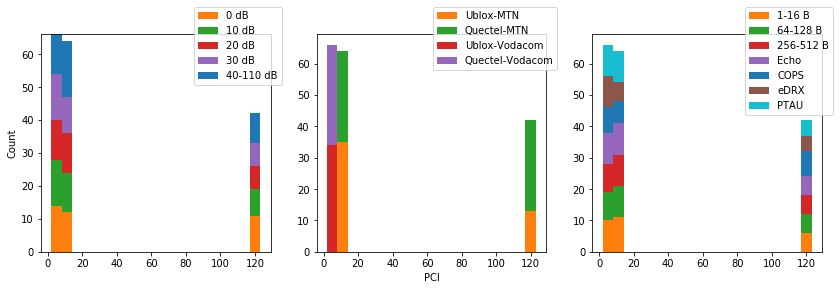

[ 11.  14. 123.] [ 1 34 13]
[ 11.  14. 123.] [ 3 26 29]
[2.] [34]
[2.] [32]
|                 |   11 |   123 |   14 |   2 |
|-----------------|------|-------|------|-----|
| Ublox-MTN       |    1 |    34 |   13 |   0 |
| Quectel-MTN     |    3 |    26 |   29 |     |
| Ublox-Vodacom   |   34 |       |      |     |
| Quectel-Vodacom |   32 |       |      |     |


In [306]:
_, _, cellid = p3.hist()
# cid = np.array([np.array(cd) for cd in cellid])
cid = cellid
ulist = []
clist = []
tab = []
nw = ["Ublox-MTN", "Quectel-MTN", "Ublox-Vodacom", "Quectel-Vodacom"]
for c, n in zip(cid, nw):
    u, cnts = np.unique(c, return_counts=True)
    print(u, cnts)
    t = [[n], cnts]
    t = [p for r in t for p in r]
    tab.append(t)
    ulist.append(u)
    clist.append(c)
#     print(np.unique([s for u in ulist for s in u]), u)
# tab
# table = [["Ublox-MTN",42,3], ["Quectel-MTN",451,3], ["Ublox-Vodacom",4], ["Quectel-Vodacom",3]]
# headers = ["", "qty", "sun"]
headers = np.unique([str(int(el)) for u in ulist for el in u])
headers = np.insert(headers, 0, '')
tab[0].append(0)
print(tabulate(tab, headers, tablefmt="github"))